### NLP Challenge: 

### Amazon Consumer Product Reviews.

<img src="https://user-images.githubusercontent.com/55968160/78334293-5dc88300-7540-11ea-970f-bbf985e99009.png" width="500" height="300" />


- First, make sure to clean your data. You can use the data cleaning techniques we covered in the second checkpoint. However, every text data is likely to have its own peculiar cleaning requirements. So, you should make sure that you clean your dataset appropriately.
- If your dataset includes numerical features, then you should also work on them for cleaning purposes like dealing with missing values and outliers.
- After the data cleaning step, make some exploratory data analysis to get to know your dataset better. In the exploratory data analysis, you should both analyze your numerical features and your text features. If you feel that converting your text features into a numerical form is required for your exploratory analysis, then you can do this step after vectorizing your text.
- Convert your text features into numerical form. You're free to choose your method. You can use BoW, tf-idf, word2vec or any other method you'd like to experiment. We recommend to use several methods so that you can compare the results with respect to the methods you apply.
- You can choose whatever NLP task you want. You're completely free on your choice. Some possible options are:
- Sentiment analysis.
- Text classification.
- Topic modeling.
- Developing a more sophisticated chatbot that what we developed in this module.
- Training a deep learning model for a supervised or unsupervised task you choose.

In [1]:
#Library Imports
import pandas as pd
import numpy as np
import datetime
import sklearn
from sklearn.preprocessing import LabelEncoder

import scipy
import spacy
import re
import gensim
import markovify
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn import ensemble

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from chatterbot import ChatBot
from chatterbot.trainers import ListTrainer, ChatterBotCorpusTrainer
from chatterbot.conversation import Statement

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [2]:
df = pd.read_csv("Consumer_Review.csv")

In [3]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [5]:
#Let's Drop unnecessary columns.
df.drop(columns=['reviews.sourceURLs', 'sourceURLs','keys','asins', 'manufacturerNumber', 'id','imageURLs', 'reviews.date', 'reviews.dateSeen','reviews.didPurchase','reviews.id','dateAdded','reviews.doRecommend'], inplace=True)
#Renaming columns for simplicity.
df.rename(index =str, columns={'reviews.text': 'text', 'reviews.title':'title', 'reviews.rating':'rating'}, inplace = True)
#Changing the date format.
df['dateUpdated'] = pd.to_datetime(df['dateUpdated'])
#Filling Na's with mean values.
df['reviews.numHelpful'].fillna(df['reviews.numHelpful'].mean(), inplace = True)

In [6]:
df.head()

,dateUpdated,name,brand,categories,primaryCategories,manufacturer,reviews.numHelpful,rating,text,title,reviews.username
0,2019-04-25 09:08:16+00:00,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,0.529321,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang
1,2019-04-25 09:08:16+00:00,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,0.529321,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG
2,2019-04-25 09:08:16+00:00,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,0.529321,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert
3,2019-04-25 09:08:16+00:00,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,0.529321,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson
4,2019-04-25 09:08:16+00:00,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,AmazonBasics,0.529321,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda


In [7]:
df.shape

(28332, 11)

### EDA

In [8]:
def text_cleaner(text):
    # visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = re.sub(r"(\b|\s+\-?|^\-?)(\d+|\d*\.\d+)\b", " ", text)
    text = ' '.join(text.split())
    return text

In [9]:
df.text = df.text.apply(text_cleaner)

In [10]:
nlp = spacy.load('en')

# below is necessary to avoid memory error of SpaCy
nlp.max_length = 20000000

# all the processing work is done below, so it may take a while
amazon_doc = nlp(" ".join(df.text))

## 1) Sentiment Analysis.

First let's try out **Positive** sentiment analysis (i.e, Rating greater or equal to 4)

In [11]:
# all the processing work is done below, so it may take a while
amazon_positive_doc = nlp(" ".join(df[df["rating"]>=4].text))

product_positive_sents = " ".join([sent.text for sent in amazon_positive_doc.sents if len(sent.text) > 1])

product_positive_generator = markovify.Text(product_positive_sents, state_size = 3)

# three randomly generated positive sentences
for i in range(20):
    print(product_positive_generator.make_sentence(tries=100))

# three randomly-generated positive sentences of no more than 100 characters
for i in range(20):
    print(product_positive_generator.make_short_sentence(100, tries=100))

This tablet is perfect for young children and comes ready to use straight out of the house so I will buy it again if anything ever happened to it.
For example, if you have pime! great tablet for most of my downloads are through my PC.
But, I will say however they do not you get / the life span of the amazons brand battery and I would highly recommend a battery tester!
It's nice to be able to use a small band to keep them entertained, comes with android.
It's hard to get batteries out I purchased these to use in lanterns.
I just put of these in the same container.
Got this as a gift.
Appears to perform as well I'll re-order them.
Good charge worked great for me I will come back again This e-reader meets all expectations and has a better build.
Great video quality lots of fun and educational games on it but so far so good!
I prefer the Kindle to read books.
I got him a drone for Christmas and she loves it!! Excellent price for a versatile tablet.
This allows access to everything importan

**Negative Reviews**

In [12]:
# all the processing work is done below, so it may take a while
amazon_negative_doc = nlp(" ".join(df[df["rating"]<=3].text))

product_negative_sents = " ".join([sent.text for sent in amazon_negative_doc.sents if len(sent.text) > 1])

product_negative_generator = markovify.Text(product_negative_sents, state_size = 3)

# three randomly generated negative sentences
for i in range(20):
    print(product_negative_generator.make_sentence(tries=100))

# three randomly-generated negative sentences of no more than 100 characters
for i in range(20):
    print(product_negative_generator.make_short_sentence(100, tries=100))

Very disappointed that my Kindle Voyage, purchased in April, failed after just two years of sitting on the shelf, the batteries that I installed that day still seem to be working very well - - last a day in an xbox controller, if you're lucky Many of the batteries won't recharge, so I threw them away Adequate Affordable Bad shelf life.
The last thing I would change is being able to select by seeing the cover of the book.
I didn't expect them to be as good as the ones from the store Batteries die quicker than Dollar store batteries.
Great value for kid's toys, but they don't have the strength or long run time.
To say that another way, these batteries cost me around + in having to buy the larger size Amazon batteries still carry the older name.
I have no issue with the port and charger cable.
The outer cardboard box is frustration-free, but the batteries are supposed to be better are also horrible for photographers.
Being that they are terrible.
These batteries don't last half as long as

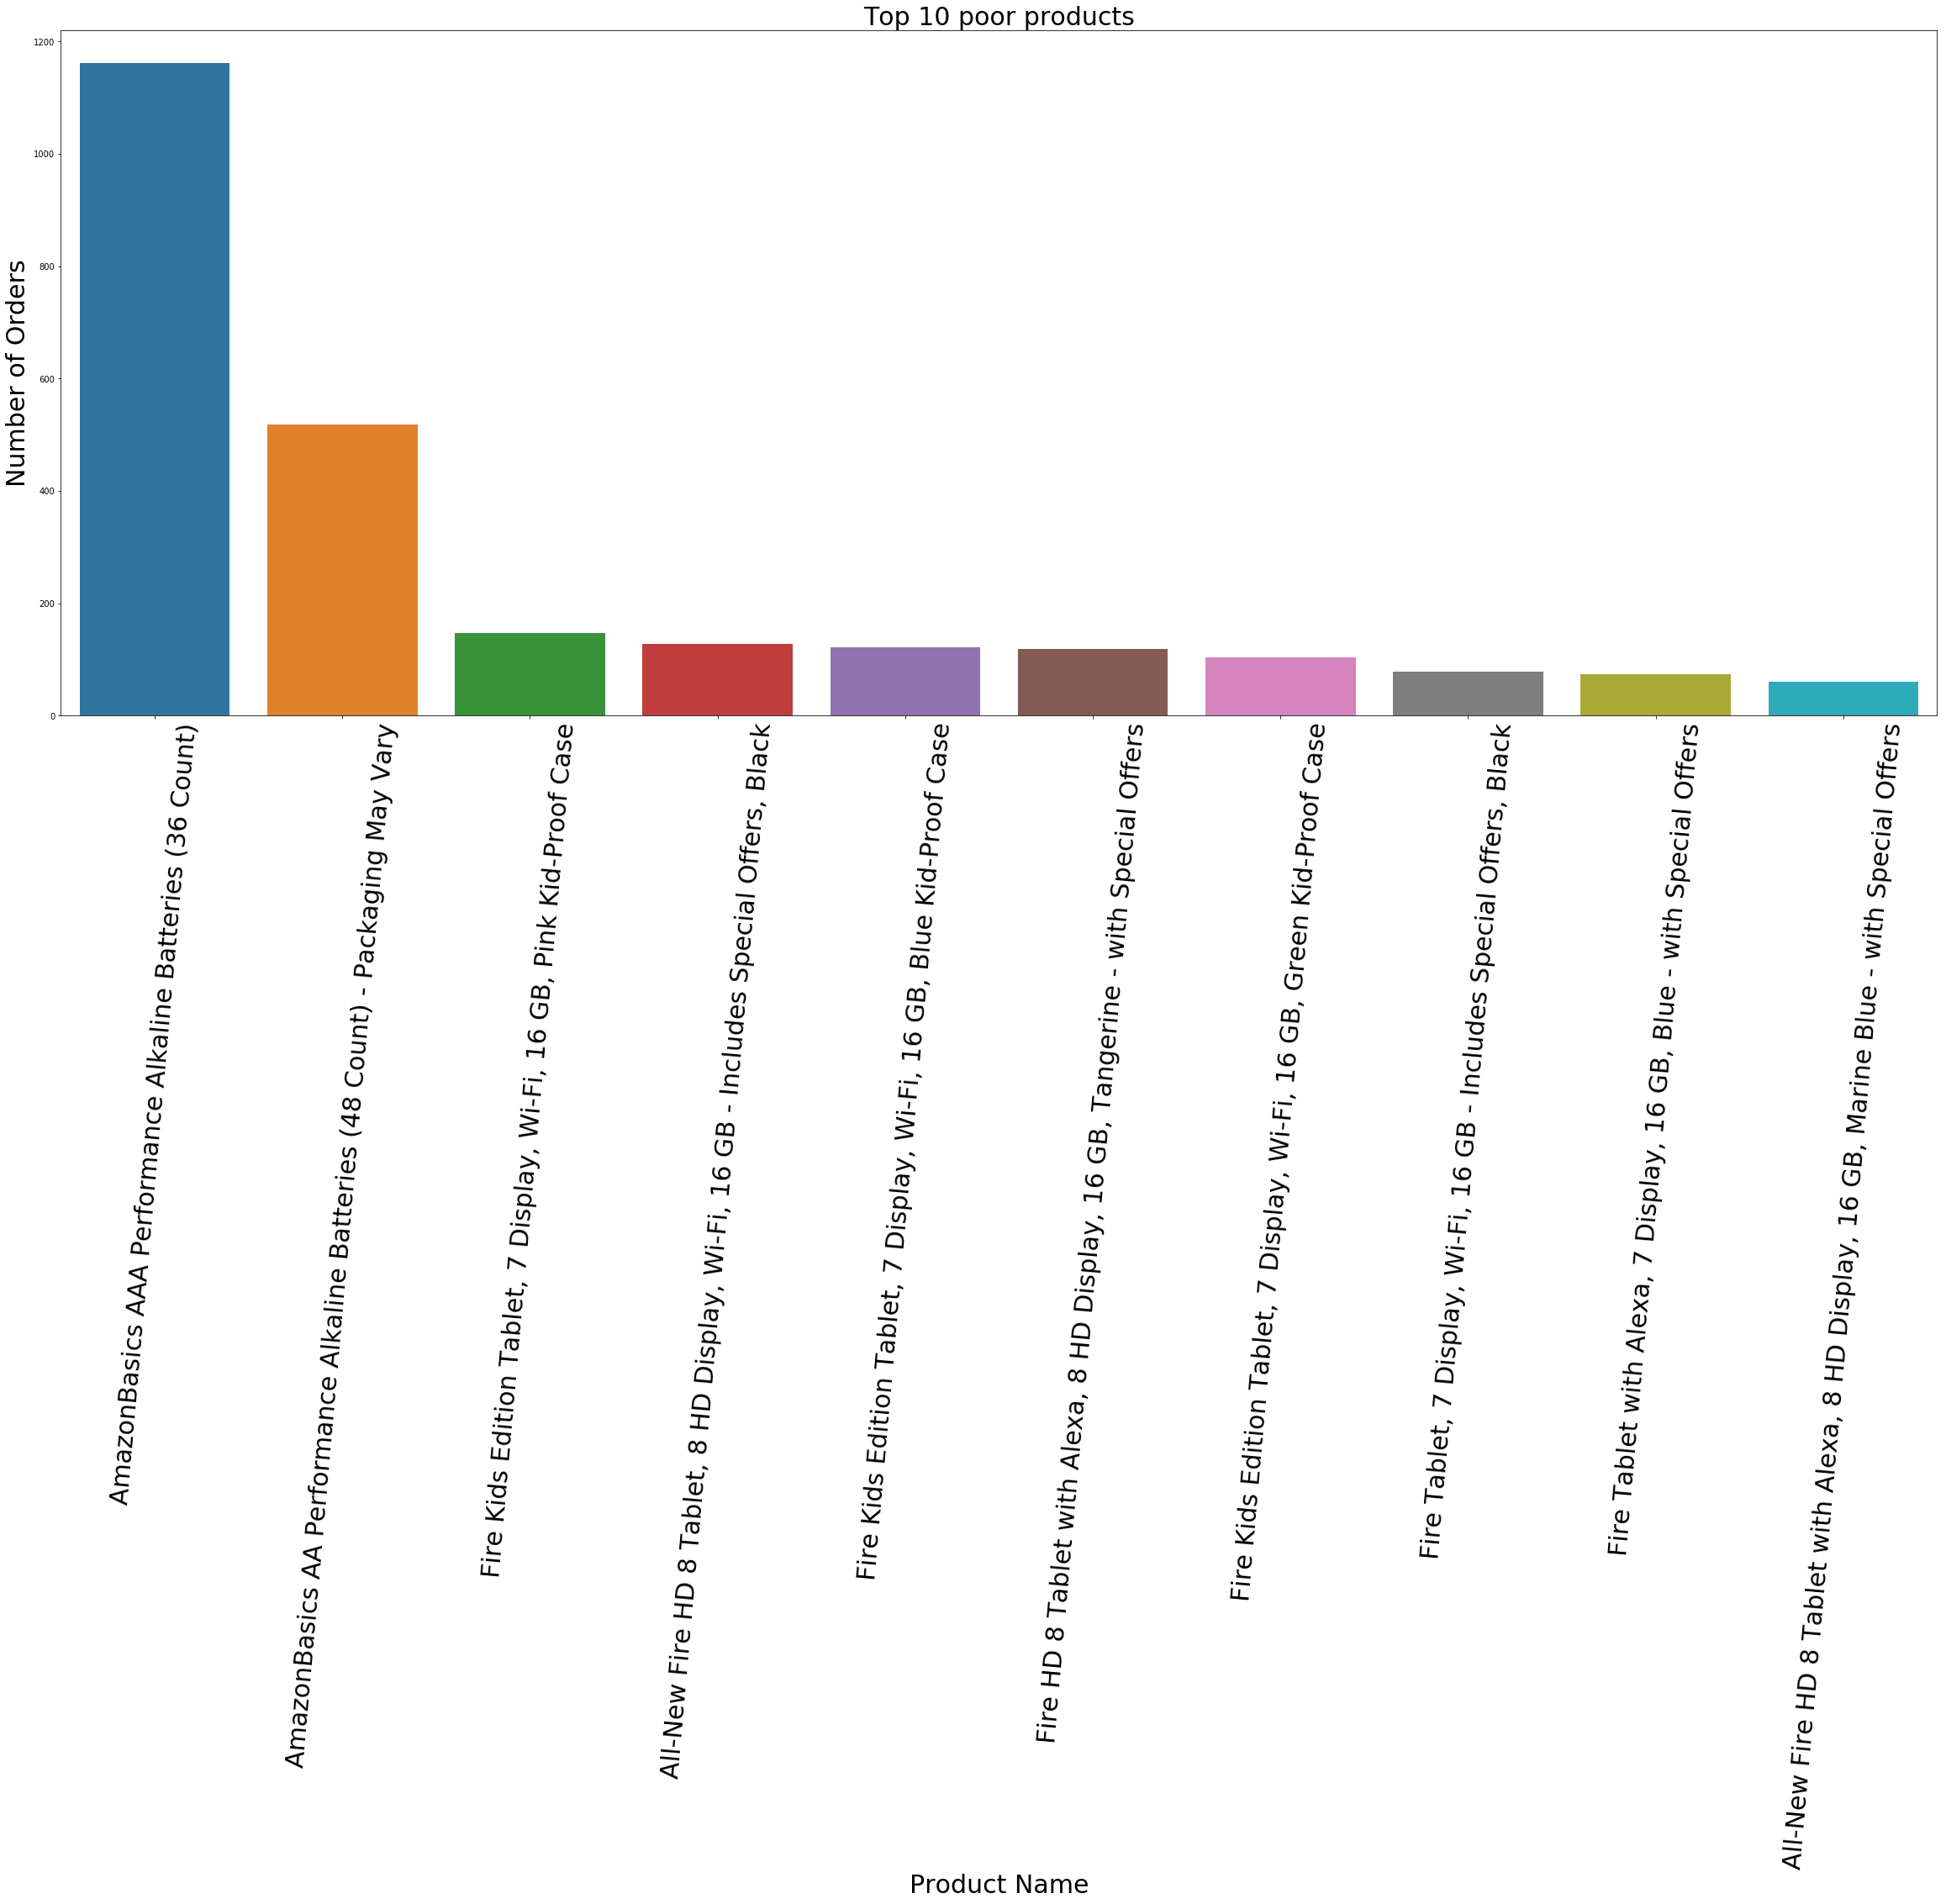

In [13]:
bad_products= df[df["rating"]<=3]['name']


plt.figure(figsize=(40,15))

sns.barplot(x=df[df["rating"]<=3]['name'].value_counts().nlargest(10).index, 
            y=df[df["rating"]<=3]['name'].value_counts().nlargest(10))

plt.xticks(rotation=85, size=30)
plt.title('Top 10 poor products', size=30)
plt.xlabel('Product Name', size=30)
plt.ylabel('Number of Orders', size=30)
plt.show()

## 2) Let's make a chatbox!

In [14]:
#Dialog sentences more than one character
dialog_sents = [sent.text for sent in amazon_doc.sents if len(sent.text) > 1]

In [15]:
# create a chatbot
chatbot = ChatBot('Dialogs')
# this is to remove the accumulated knowledge base
chatbot.storage.drop()

# create a new trainer for the chatbot
trainer = ListTrainer(chatbot)

# train the chatbot
trainer.train(dialog_sents)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sajithgowthaman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sajithgowthaman/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


List Trainer: [####################] 100%


In [16]:
GREETING_INPUTS = ["hello", "hi", "greetings", "what's up","hey"]
GREETING_RESPONSES = ["hello", "hi", "hey", "hi there"]
def greeting(sentence):
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [17]:
import random

print("Cornell: I will try to respond you reasonably. If you want to exit, type bye please.")

# below is the chatting
while True:
    
    user_input = input("User: ")
    user_input=user_input.lower()
    
    if(user_input!='bye'):
        if(user_input == 'thanks' or user_input == 'thank you'):
            break
            print("Cornell: You're welcome.")
        else:
            if(greeting(user_input) != None):
                print("Cornell: " + greeting(user_input))
            else:
                print("Cornell: ", end = "")
                print(chatbot.get_response(user_input))
    else:
        print("Cornell: Bye! It was a great chat.")
        break

Cornell: I will try to respond you reasonably. If you want to exit, type bye please.
User: hello
Cornell: hello
User: What battery is good?
Cornell: all dead a couple of low juice ones, but I bought a charger and all is good
User: are the batteries bad?
Cornell: Bulk is always the less expensive way to go for products like these
User: what product is the worst?
Cornell: Not sure if these were manufactured second hand but more than half of the pack died within ONE USE.
User: bye
Cornell: Bye! It was a great chat.


#### The chatbox works better than expected. With the input we give, the bot is actually able to produce whatever is matching the question.

## 3) Text Classification
**Classification and predicting texts according to the product name**

Let's check the linguistic annotations to provide insights into a text’s grammatical structure. This includes the word types, like the parts of speech, and how the words are related to each other.

In [18]:
# initial exploration of sentences
sentences = list(amazon_doc.sents)
print("amazon review has {} sentences.".format(len(sentences)))

example_sentence = sentences[5]
print("Here is an example: \n{}\n".format(example_sentence))

# look at some metrics around this sentence
example_words = [token for token in example_sentence if not token.is_punct]
unique_words = set([token.text for token in example_words])

print(("There are {} words in this sentence, and {} of them are"
       " unique.").format(len(example_words), len(unique_words)))

amazon review has 68224 sentences.
Here is an example: 
but for the price i am happy.

There are 7 words in this sentence, and 7 of them are unique.


In [19]:
df['text_tokenized'] = df["text"].apply(
    lambda row: [x.lemma_ for x in nlp(row) if not x.is_punct and not x.is_stop])
df['text_tokenized'] = df['text_tokenized'].apply(lambda row: "".join(row))

In [20]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
X = df['text_tokenized'].apply(lambda x: pd.Series(embed([x])[0].numpy()))

In [21]:
X["name"] = df["name"]
X.head()

In [23]:
LE = LabelEncoder()
X["name_encoded"] = LE.fit_transform(X["name"].tolist())

In [25]:
Y = X['name_encoded']
x = X.drop(['name_encoded','name'], 1)

# We split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.4, random_state=123)

# Model
rfc_params = {"n_estimators": [3, 5, 10, 15],
              "max_depth": [2, 3, 4, 5],
              "min_samples_split": [3, 5, 7, 9]}
rfc = RandomForestClassifier()

clf_rfc = GridSearchCV(rfc, rfc_params, cv=5)
clf_rfc.fit(X_train, y_train)


print("----------------------Random Forest Scores----------------------")
print('Training set score:', clf_rfc.score(X_train, y_train))
print('\nTest set score:', clf_rfc.score(X_test, y_test))

/Users/sajithgowthaman/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


----------------------Random Forest Scores----------------------
Training set score: 0.29548796988058124

Test set score: 0.29294979264096005


## 4) Generating Tf-Idf and performing LSA

In [26]:
amazon_sents = [[sent] for sent in amazon_doc.sents]
sentences = pd.DataFrame(amazon_sents, columns = ["reviews"])

In [27]:
for i, sentence in enumerate(sentences["reviews"]):
    sentences.loc[i, "reviews"] = " ".join(
        [token.lemma_ for token in sentence if not token.is_punct and not token.is_stop])

In [28]:
sentences.head()

,reviews
0,order item bad quality
1,miss backup spring
2,pcs aluminum battery work
3,Bulk expensive way product like
4,Duracell


In [29]:
X_train, X_test = train_test_split(sentences["reviews"], test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case ()
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
sentences_tfidf=vectorizer.fit_transform(sentences["reviews"])
print("Number of features: %d" % sentences_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(sentences_tfidf, test_size=0.4, random_state=0)

#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[10])
print('Tf_idf vector:', tfidf_bypara[10])

Number of features: 5487
Original sentence: buy
Tf_idf vector: {'kindle': 0.2757271286263319, 'button': 0.4331462905452476, 'turn': 0.4083606949262271, 'page': 0.4324112849757877, 'hold': 0.37954107269007237, 'hand': 0.4066870624773667, 'easy': 0.2705089136167734}


### Latent Semantic Analysis

In [30]:
#Our SVD data reducer.  We are going to reduce the feature to 350
svd= TruncatedSVD(350)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
X_train_lsa = lsa.fit_transform(X_train_tfidf)

variance_explained=svd.explained_variance_ratio_
total_variance = variance_explained.sum()
print("Percent variance captured by all components:",total_variance*100)

#Looking at what sorts of paragraphs our solution considers similar, for the first five identified topics
paras_by_component=pd.DataFrame(X_train_lsa,index=X_train)
for i in range(5):
    print('-------COMPONENT {}:'.format(i))
    print(paras_by_component.loc[:,i].sort_values(ascending=False)[0:10])
    print("-------------------------------------------------------------")

Percent variance captured by all components: 68.35328101986721
-------COMPONENT 0:
reviews
great price good product work GREAT great price great product great price battery great price battery great price battery    0.815690
work good battery great price                                                                                                0.801522
great battery good price great battery well price                                                                            0.800418
great battery good price great battery price                                                                                 0.800418
great price good battery Great price battery                                                                                 0.800418
great battery great battery great price great price perfect need love battery buy                                            0.797277
great battery great price                                                                                

## 5)Unsupervised Machine Learning

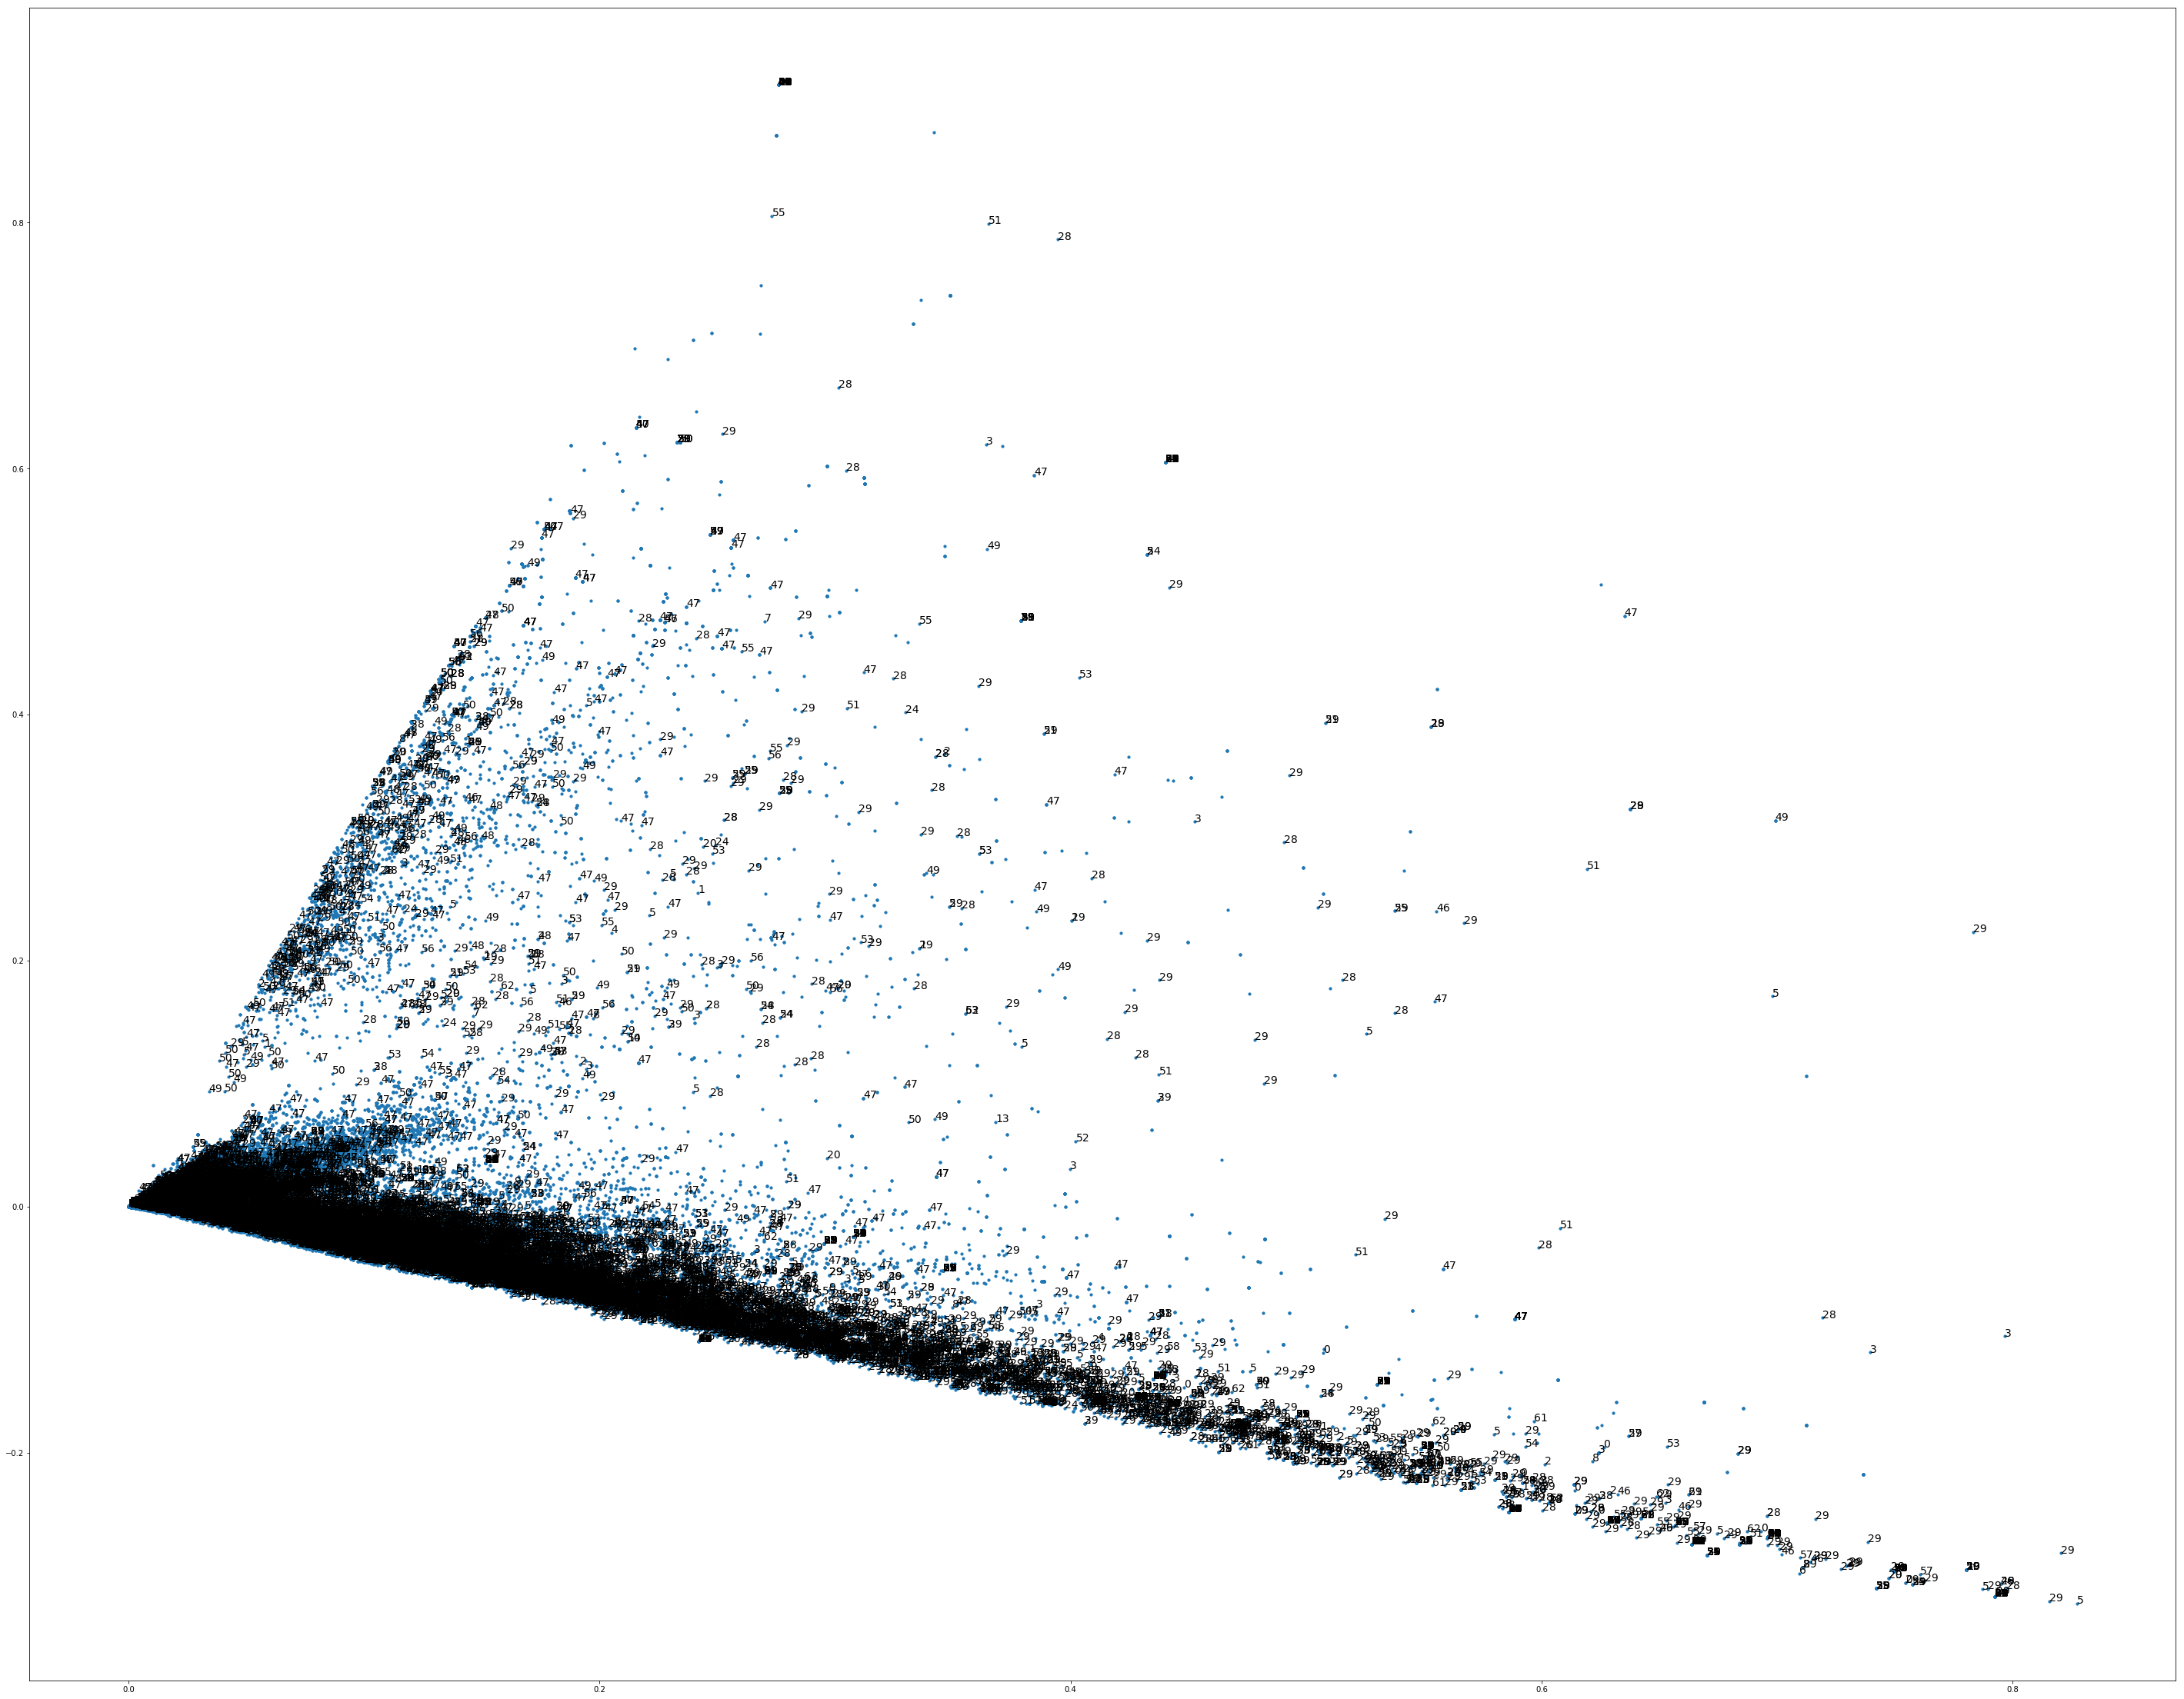

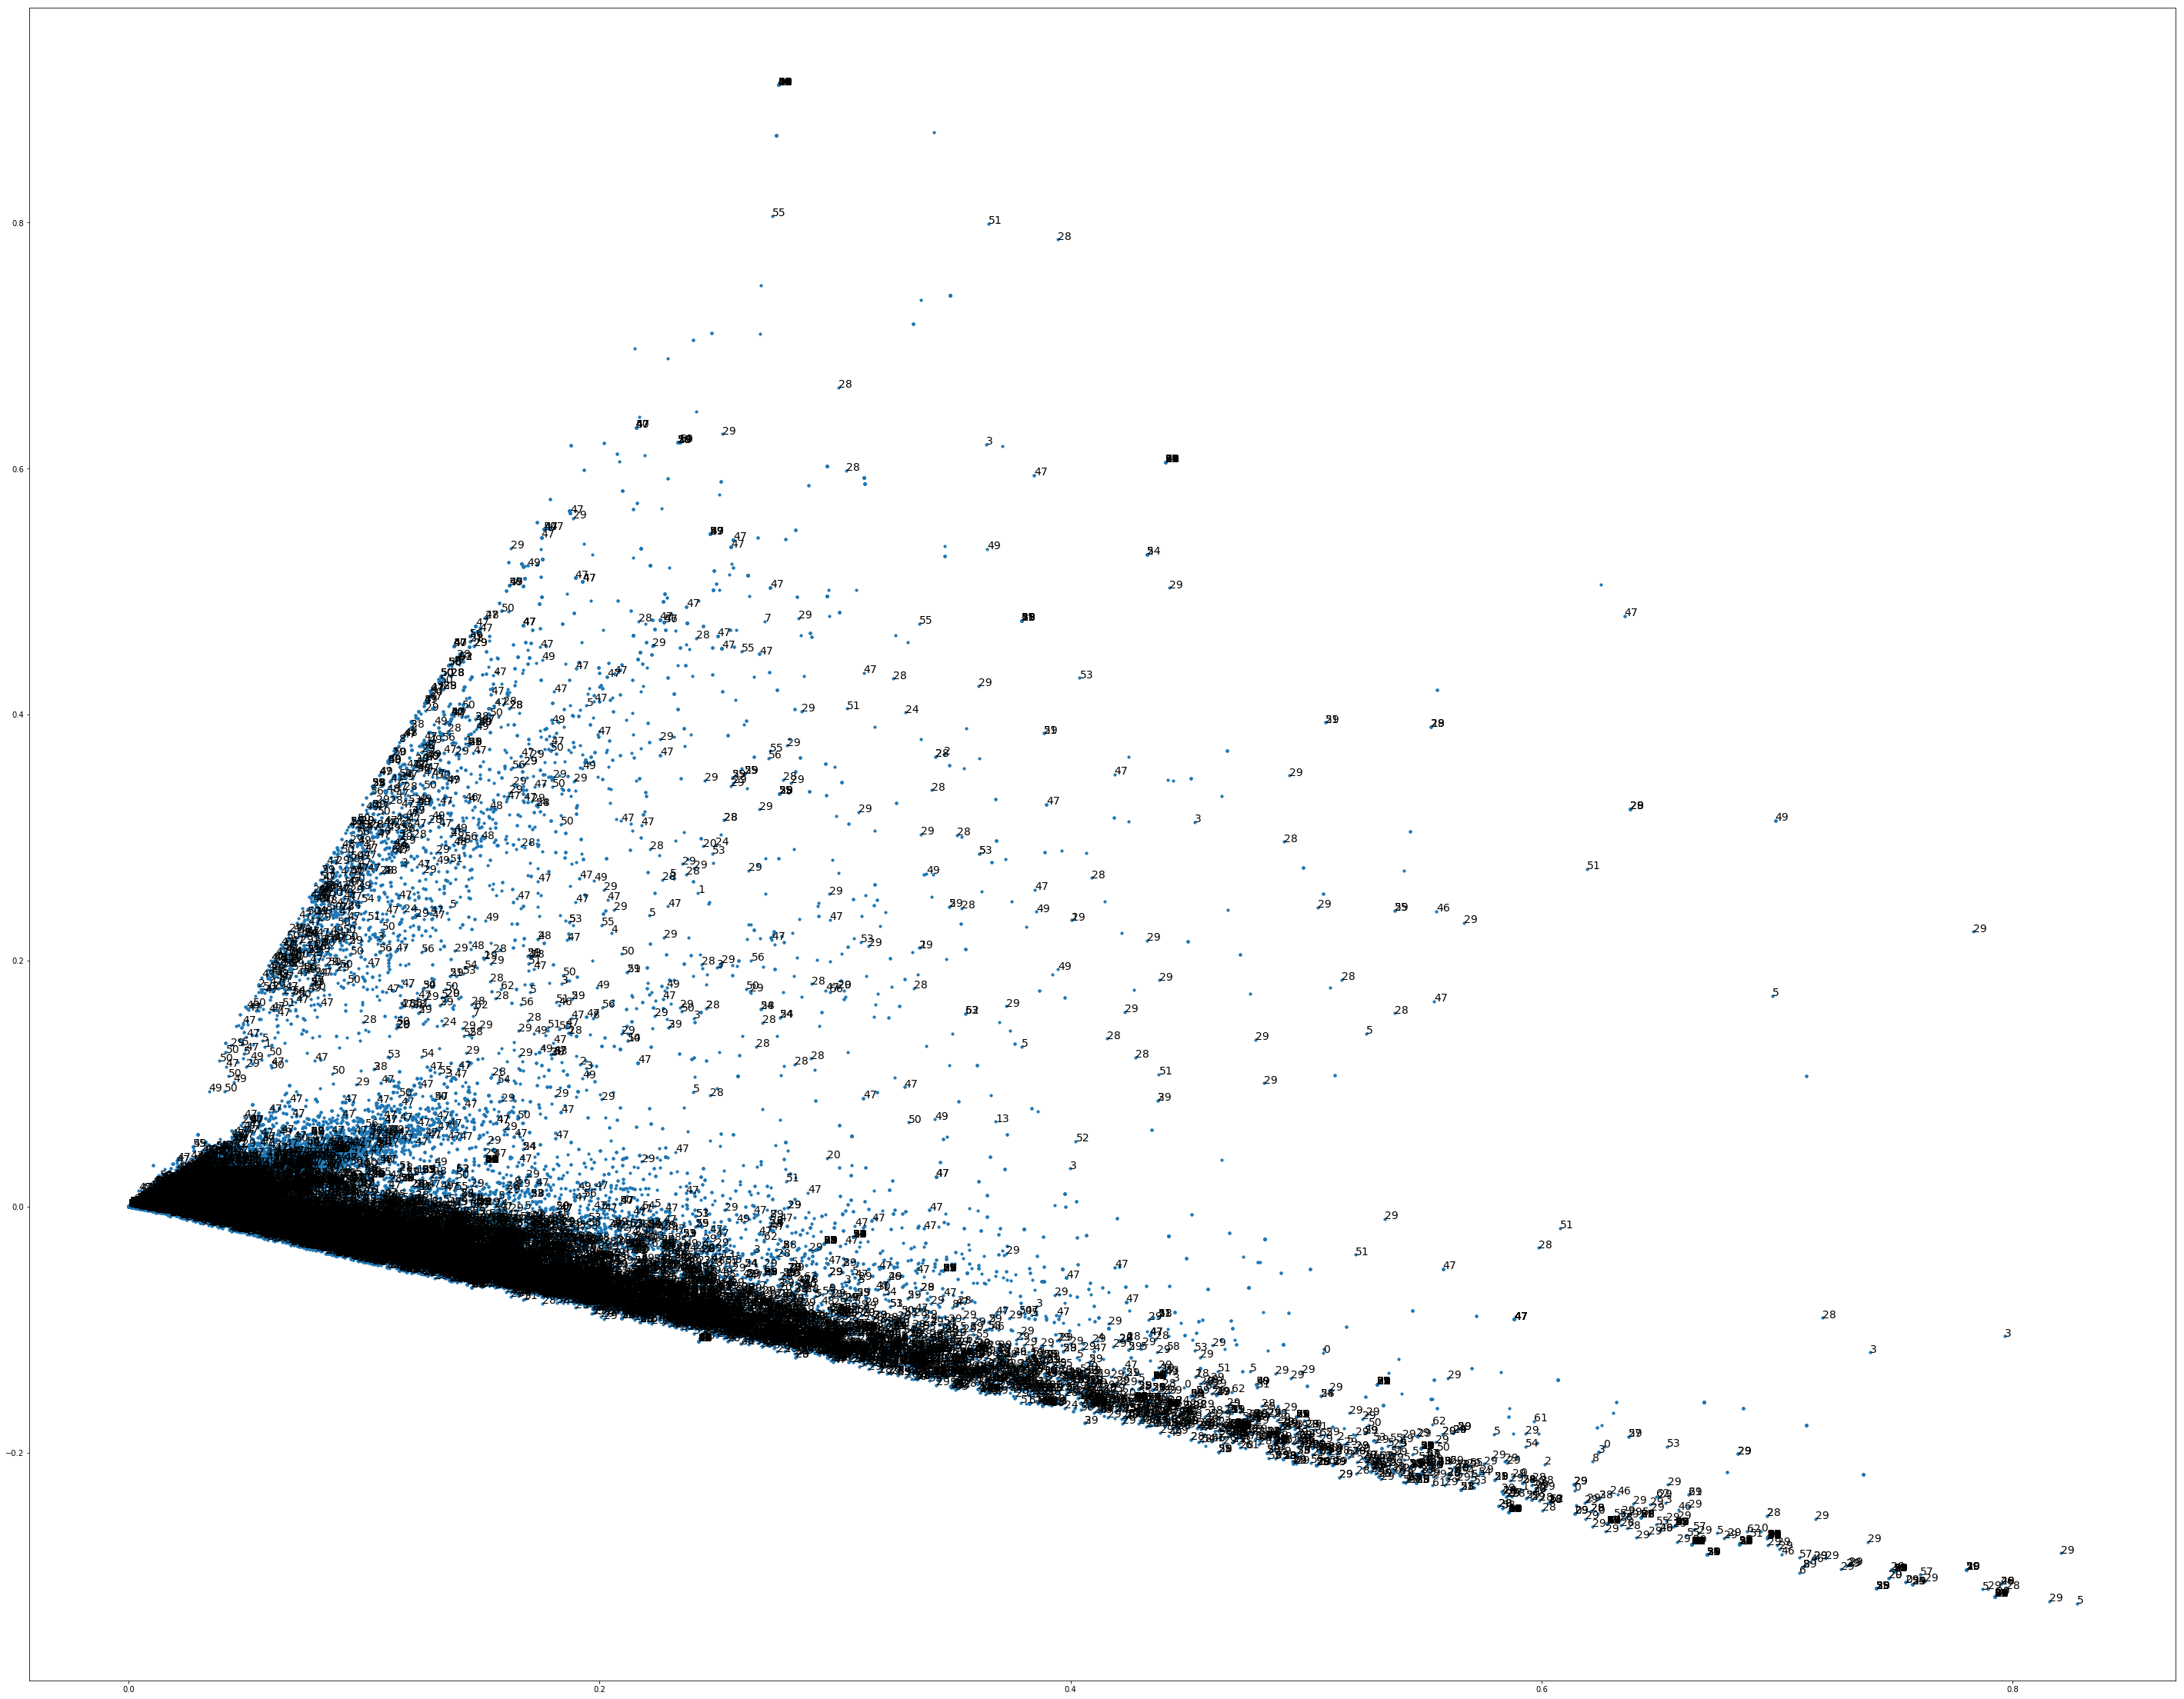

In [31]:
def plot_LSA(test_data, test_labels, plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        if plot:
            x = lsa_scores[:,0]
            y = lsa_scores[:,1]
            plt.scatter(x, y, s=10, alpha=1)
            for i,label in enumerate(test_labels):
                plt.text(x[i], y[i], label, fontsize=14)
                
                
# Define X and the data point label
sent = sentences["reviews"]
label = X["name_encoded"]

def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_tfidf, tfidf_vectorizer = tfidf(sentences["reviews"])

# Plot TFIDF
fig = plt.figure(figsize=(50, 40))
plot_LSA(X_tfidf, label)
plt.show()
# Plot TFIDF
fig = plt.figure(figsize=(50, 40))
plot_LSA(X_tfidf, label)
plt.show()

In [34]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(X.drop(columns=["name","name_encoded"], axis=1))
    Sum_of_squared_distances.append(kmeans.inertia_)

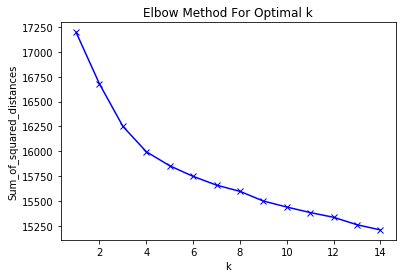

In [35]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

silhouette score:  0.026535012


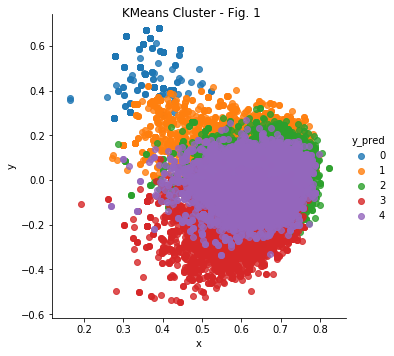

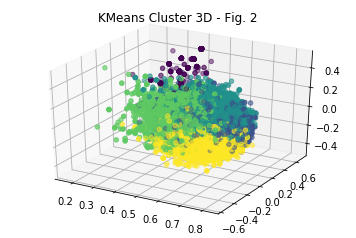

In [36]:
df_emb = X.drop(columns=["name","name_encoded"], axis=1)

# Calculate predicted values.
km = KMeans(n_clusters=5, random_state=20).fit(df_emb)
y_pred = km.predict(df_emb)

print('silhouette score: ', metrics.silhouette_score(df_emb, y_pred, metric='euclidean'))

# 2D
lsa = TruncatedSVD(n_components=2)
las_results = lsa.fit_transform(df_emb.values)
las_results = pd.DataFrame(las_results, columns=['x', 'y'])

df_y = pd.DataFrame(y_pred, columns=['y_pred'])
df_y['y_pred'] = df_y['y_pred'].astype(int)

las_results = pd.concat([las_results, df_y], axis=1)

#Plot
lm = sns.lmplot(data=las_results, x='x', y='y', hue='y_pred',
                   fit_reg=False, legend=True, legend_out=True)
fig = lm.fig
fig.suptitle("KMeans Cluster - Fig. 1", fontsize=12)

# 3D
lsa = TruncatedSVD(n_components=3)
las_results = lsa.fit_transform(df_emb.values)
las_results = pd.DataFrame(las_results)

df_y = pd.DataFrame(y_pred, columns=['y_pred'])
df_y['y_pred'] = df_y['y_pred'].astype(int)

las_results = pd.concat([las_results, df_y], axis=1)

fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(las_results[0].values, las_results[1].values, las_results[2].values, c=las_results['y_pred'])
ax.set_title("KMeans Cluster 3D - Fig. 2")
pyplot.show()

# Combine df with y_pred to see cluster results
results = pd.concat([df, df_y], axis=1)
results = results.drop(columns=['text'])

### Supervised Learning

In [ ]:
X.drop(['text'], inplace=True, axis = 1)

In [ ]:
y = X['name_encoded']
X_1 = X.drop(['name_encoded','name'], 1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=90)

In [ ]:
X_1 = X.drop(['name_encoded','name'], 1)
Y = X['name_encoded']

# Random Forest: 
rfc = ensemble.RandomForestClassifier(n_jobs=2)

# Choose some parameter combinations to try
parameters = {
                'n_estimators': [3, 5, 10, 15], 
                'max_features': ['auto'], 
                'criterion': ['entropy', 'gini'],
                'max_depth': [5, 10, 13], 
                'min_samples_split': [2, 3, 5],
                'min_samples_leaf': [1, 2, 5]
             }

# Run the grid search
grid_obj = GridSearchCV(rfc, parameters, cv=3, n_jobs=-1, verbose=1)
grid_obj.fit(X_1, y)

In [ ]:
# Set the clf to the best combination of parameters
grid_obj.best_estimator_

print("----------------------Random Forest Scores----------------------")
print('Training set score:', clf_rfc.score(X_train, y_train))
print('\nTest set score:', clf_rfc.score(X_test, y_test))

### Summary
* Performed Sentiment analysis for positive and negative produce reviews and plotted the top 15 products with negative reviews.
* Made a chatbox that answers any questions related to the reviews with decent answers.
* Classification of Text was done using Tensorflow's hub for storing high dimension data. Achieved a score of 30%.
* Tf-Idf vectors were generated and LSA was performed by preserving 70% variance.
* Unsupervised Learning's K-means algorithms was applied to study the structure of the data. 3D plots were plotted.